In [160]:
# Exercise 1

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [161]:
# Estimation of static value
# estimate the weight over 15 measurements (in real-time).

actual_weight = 78.56
zns = [78.2,78.9,78.1,78.3,78.4,78.9,78.6, 78.8,78.7,78.4,79,78.2,78.7,78.7,78.3]
estimates = []
iters = []

prediction = actual_weight

for i, z_1 in enumerate(zns):
    n = i + 1 # at the time n
    kalman_gain = 1 / n
    current_estimate = prediction + kalman_gain * (z_1 - prediction) # State Update Equation
    prediction = current_estimate # because the system is static, weight is not supposed to change
    iters.append(n)
    estimates.append(prediction)

zns = pd.Series(zns, index=iters)
estimates = pd.Series(estimates, index=iters)

Text(0.5, 1.0, 'Kalman Filter, State Update Equation, Weighting')

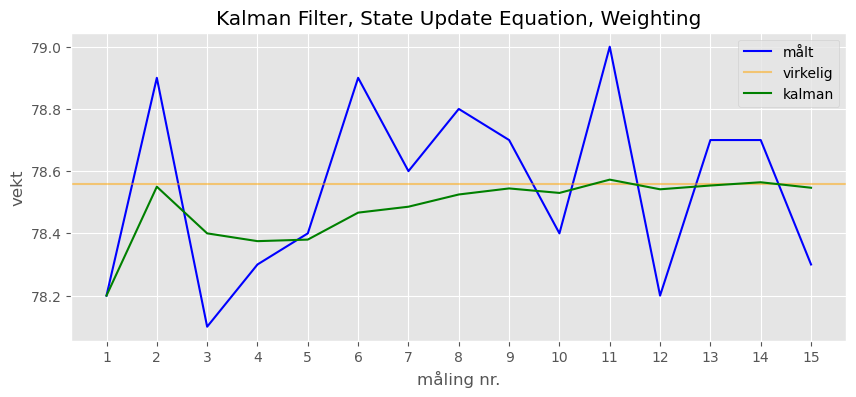

In [164]:
# plot the measurements, estimations and true weight.

fig, ax = plt.subplots(figsize=(10, 4))

zns.plot(kind='line', ax=ax, color='blue', label='målt')
ax.axhline(78.56, color='orange', alpha=0.5, label='virkelig')
estimates.plot(kind='line', ax=ax, color='green', label='kalman')
ax.set_xticks(range(1, len(zns) + 1))
ax.set_xticklabels(zns.index)
ax.legend()
ax.set_xlabel('måling nr.')
ax.set_ylabel('vekt')
ax.set_title('Kalman Filter, State Update Equation, Weighting')

In [165]:
# Exercise 2

In [166]:
# read measurements from file and store them in two lists
time_measurements = []
position_measurements = []

with open('noisy_position.txt') as file:
    lines = file.read().splitlines()
    
for line in lines:
    time_measurements.append(line.split('    ')[0])
    position_measurements.append(line.split('    ')[1])
file.close()

time_measurements.remove('t[s]')
position_measurements.remove('z[m]')

# convert from string to float
time_measurements = [float(i) for i in time_measurements]
position_measurements = [float(i) for i in position_measurements]

data = []
itr = []

a = 0.2 #alpha
b = 0.1 #beta
t_interval = 0.5 # track-to-track interval

# initial conditions for time n = 0
estimated_position = 11000 # estimated range at time n
estimated_velocity = 50 # estimated velocity at time n

# State Extrapolation Equations
predicted_position = estimated_position + t_interval * estimated_velocity # predict target position at time n, also initial guess
predicted_velocity = estimated_velocity # predict target velocity for time n, also initial guess

# go through the steps
for time, position in zip(time_measurements, position_measurements):
    # State Update Equations/track update equations/track filtering equations
    estimated_position = predicted_position + a * (position - predicted_position) # current estimate for position
    if time != 0:
        estimated_velocity = predicted_velocity + b * (position - predicted_position) / time # current estimate for velocity

    # State Extrapolation Equations
    predicted_position = estimated_position + time * estimated_velocity # next estimate for position
    predicted_velocity = estimated_velocity # next estimate for velocity
    
    itr.append(time)
    data.append({'pos_e': estimated_position, 'vel_e': estimated_velocity, 'pos_p': predicted_position, 'vel_p': predicted_velocity, 'pos_m': position})

data = pd.DataFrame(data, index=itr)
# data

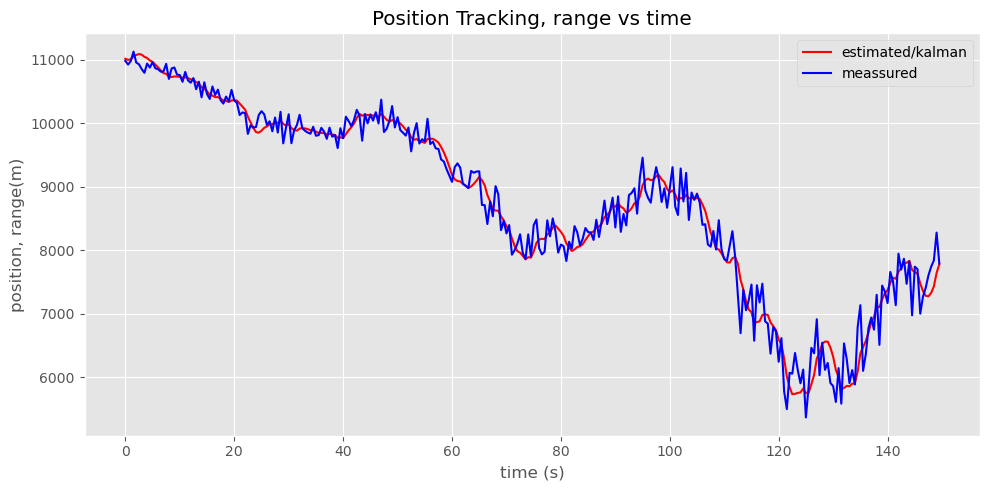

In [167]:
# Below, we plot the estimated and measured positions over time.

fig, ax = plt.subplots(figsize=(10, 5)) 

_ = data.pos_e.plot(kind='line', color='red', label=r'estimated/kalman', ax=ax)
_ = data.pos_m.plot(kind='line', color='blue', label=r'meassured', ax=ax)
_ = ax.legend()
_ = ax.set_xlabel('time (s)')
_ = ax.set_ylabel(r'position, range(m)')
_ = ax.set_title('Position Tracking, range vs time')

plt.tight_layout()


    